In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

def LYSO_total(t, tau, RC, QsuC):            #funzione di fit per lyso totale, fit della salita e della discesa
    return QsuC*(np.exp(-t/RC)-np.exp(-(t)/tau))

#media pesata
#media pesata sugli errori di un array x con errori dx
def w_mean(x,dx):
    return np.sum(x/dx**2)/np.sum(1/dx**2), np.sqrt(1/np.sum(1/dx**2))

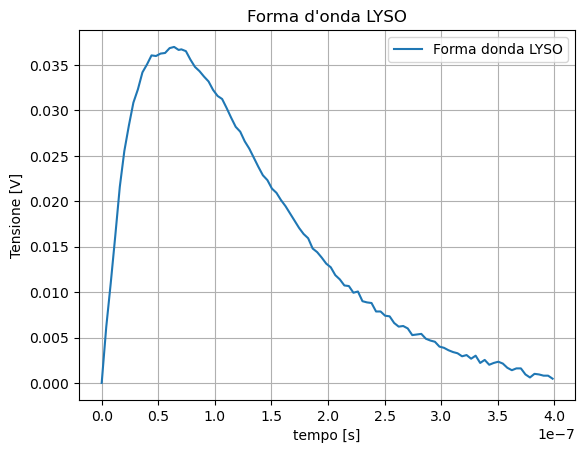

In [5]:
taus = np.zeros(6)
err_taus =  np.zeros(6)
RCs= np.zeros(6)
err_RCs= np.zeros(6)
QsuCs= np.zeros(6)
err_QsuCs= np.zeros(6)

plt.plot(time, volt, label='Forma donda LYSO')
plt.xlabel('tempo [s]')
plt.ylabel('Tensione [V]')
plt.title('Forma d\'onda LYSO') 
plt.legend()
plt.grid()
plt.show()

for i in range(0,6):
#FIT FORMA D'ONDA CSI

    #FIT FORMA D'ONDA LYSO

    data = pd.read_csv('LYSO-Forma.CSV', delimiter=';')
    data1= pd.read_csv('LYSO-Salita.CSV', delimiter=';')
    data2= pd.read_csv('LYSO-Discesa.CSV', delimiter=';')

    smooth1=1+i
    smooth2=23+i
    times=np.array(data1['Time']+3.36e-08)[::smooth1]
    timed=np.array(data2['Time']+3.36e-08)[::smooth2]
    volts = np.array(data1['Voltage']-0.0007333333333333333)[::smooth1]
    voltd = np.array(data2['Voltage']-0.0007333333333333333)[::smooth2]
    time = np.concatenate((times,timed))    
    volt = np.concatenate((volts,voltd))


    #err sist sensibilità oscilloscopio
    err_volt_s = np.array(data1['error'])[::smooth1]
    err_volt_d = np.array(data2['error'])[::smooth2]
    err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+(0.0008)**2)
    

    

    #FIT TOTALE LYSO

    ls = LeastSquares(time, volt, err_volt, LYSO_total)
    m1 = Minuit(ls,tau=4e-8, RC=8e-8, QsuC=0.035)
    m1.migrad()
    m1.hesse()

    taus[i]=m1.values['tau']
    err_taus[i]=m1.errors['tau']
    RCs[i]=m1.values['RC']
    err_RCs[i]=m1.errors['RC']
    QsuCs[i]=m1.values['QsuC']
    err_QsuCs[i]=m1.errors['QsuC']

taus=np.array(taus)
err_taus=np.array(err_taus)
RCs=np.array(RCs)
err_RCs=np.array(err_RCs)   
QsuCs=np.array(QsuCs)
err_QsuCs=np.array(err_QsuCs)

$\tau$ = (42.443 $\pm$ 1.897) ns
$RC$ = (84.730 $\pm$ 1.440) ns


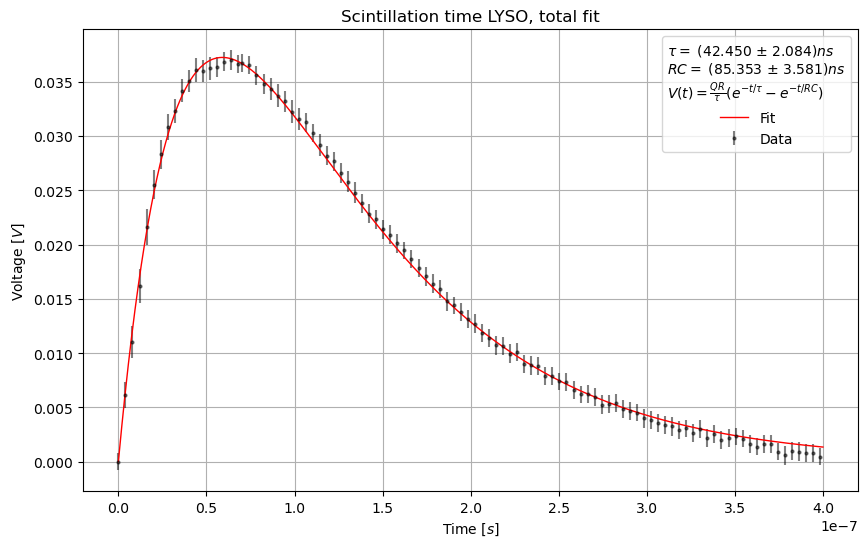

In [6]:

# plot finale

smooth1=10
smooth2=10

times=np.array(data1['Time']+3.36e-08)[::smooth1]
timed=np.array(data2['Time']+3.36e-08)[::smooth2]
volts = np.array(data1['Voltage']-0.0007333333333333333)[::smooth1]
voltd = np.array(data2['Voltage']-0.0007333333333333333)[::smooth2]
time = np.concatenate((times,timed))    
volt = np.concatenate((volts,voltd))

#err sist sensibilità oscilloscopio
err_volt_s = np.array(data1['error'])[::smooth1]
err_volt_d = np.array(data2['error'])[::smooth2]
err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+(0.0008)**2)

tau_mean, err_tau_mean = w_mean(taus, err_taus)
RCs_mean, err_RCs_mean = w_mean(RCs, err_RCs)
QsuCs_mean, err_QsuCs_mean = w_mean(QsuCs, err_QsuCs)
tot_err = np.sqrt(err_tau_mean**2+((np.max(taus)-np.min(taus))/2)**2)

print(f'$\\tau$ = ({tau_mean*1000000000:.3f} $\\pm$ {tot_err*1000000000:.3f}) ns')
print(f'$RC$ = ({RCs_mean*1000000000:.3f} $\\pm$ {err_RCs_mean*1000000000:.3f}) ns')


x_axis = np.linspace(0, 4e-7, 10000)
y = LYSO_total(x_axis, taus[2], RCs[2], QsuCs[2])
plt.subplots(figsize=(10, 6))
plt.errorbar(time, volt, err_volt, fmt='o', label='Data', markersize=2, alpha=0.5, color='black')
plt.plot(x_axis, y, color='red', label='Fit', linewidth=1)
fit_info = []
fit_info.append(f'$\\tau = $ ({taus[2]*1000000000:.3f} $\\pm$ {err_taus[2]*1000000000:.3f})' + '$ns$')
fit_info.append(f'$RC = $ ({RCs[2]*1000000000:.3f} $\\pm$ {err_RCs[2]*1000000000:.3f})' + '$ns$')
fit_info.append('$V(t) = \\frac{QR}{\\tau}(e^{-t/\\tau}-e^{-t/RC})$')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.title('Scintillation time LYSO, total fit')
plt.grid(True)
plt.xlabel('Time $[s]$')
plt.ylabel('Voltage $[V]$')
plt.show()

